In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier# this is the scikeras wrapper for Keras models to use with scikit-learn


In [2]:
## Load the MNIST dataset
(train_images, train_Labels), (test_images, test_Labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
#normalizing the data
train_images = train_images / 255
test_images = test_images / 255



In [5]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

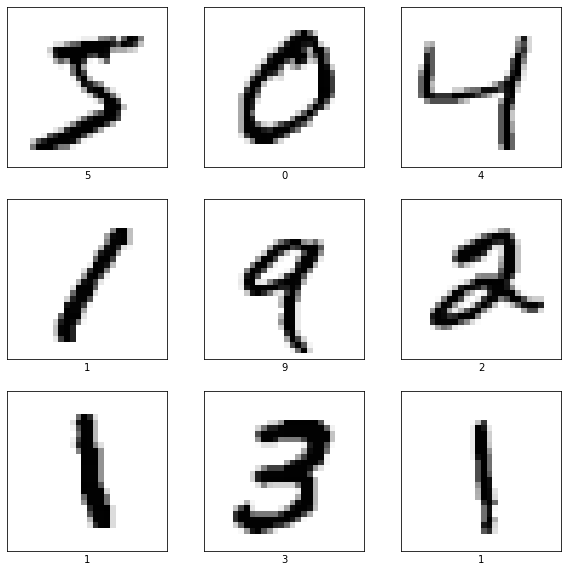

In [10]:
#visualizing the data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Labels[i]])

In [6]:
#making the model 
num_filters = 8
filter_size = 3
pool_size = 2
model = Sequential([
    Conv2D(num_filters, filter_size, activation='relu', input_shape=(28, 28, 1)), #input layer
    MaxPooling2D(pool_size), #pooling layer
    Flatten(), #flattening layer
    Dense(128, activation='relu'), #hidden layer
    Dropout(0.2), #dropout layer
    Dense(10, activation='softmax') #output layer
])


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 128)               173184    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [7]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#history = model.fit(train_images,train_Labels, epochs=10, validation_data=(test_images, test_Labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0543 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.0414 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0505 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0502 - val_acc

In [9]:
history = KerasClassifier(model, epochs=10,batch_size=28 , verbose=1)
#batchsize is the number of samples per gradient update, 28 is the number of samples in each batch
#verbos =1 means that the model will print the progress of the training
history = history.fit(train_images, train_Labels)


Epoch 1/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.2162 - accuracy: 0.9360
Epoch 2/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 3/10
2143/2143 [==============================] - 7s 3ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 4/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 5/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 6/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0289 - accuracy: 0.9904
Epoch 7/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 8/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 9/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0178 - accuracy: 0.9939
Epoch 10/10
2143/2143 [==============================] - 8s 4ms/step - loss: 0.016

313/313 - 1s - loss: 0.0516 - accuracy: 0.9878 - 548ms/epoch - 2ms/step

Test accuracy: 0.9878000020980835


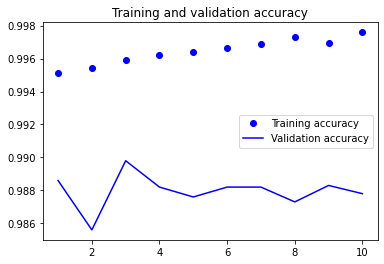

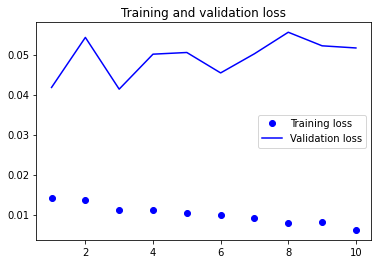

In [19]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_Labels, verbose=2)
print('\nTest accuracy:', test_acc)
#plotting the accuracy and loss of the model
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') #'bo' is the color of the line
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [20]:
model.save('ocr.h5')

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
#load the model
model = tf.keras.models.load_model('ocr.h5')

In [12]:
from sklearn.model_selection import cross_val_predict, cross_val_score
#cross validation
scores = cross_val_score(history, train_images, train_Labels, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp80_uwcn3\assets


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp80_uwcn3\assets


Epoch 1/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 2/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0132 - accuracy: 0.9953
Epoch 3/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0094 - accuracy: 0.9967
Epoch 4/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9966
Epoch 6/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0078 - accuracy: 0.9972
Epoch 7/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 8/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 9/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
INFO:tensorflow

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpjpvekyrj\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 2/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 3/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 4/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 5/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 6/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 7/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 8/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9979
Epoch 9/10
1715/1715 [==============================] - 14s 8ms/step - loss: 0.0080 - accuracy: 0.9972
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
INFO:tensorflo

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmps74njy6q\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 2/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 3/10
1715/1715 [==============================] - 18s 10ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 4/10
1715/1715 [==============================] - 18s 11ms/step - loss: 0.0105 - accuracy: 0.9961
Epoch 5/10
1715/1715 [==============================] - 19s 11ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 6/10
1715/1715 [==============================] - 19s 11ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 7/10
1715/1715 [==============================] - 19s 11ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 8/10
1715/1715 [==============================] - 20s 12ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 9/10
1715/1715 [==============================] - 20s 11ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 10/10
429/429 [==============================] - 1s 2ms/step


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp9u9j1e1j\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 2/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 3/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 4/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 6/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 7/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0096 - accuracy: 0.9966
Epoch 8/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0075 - accuracy: 0.9970
Epoch 9/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
INFO:tensorflow

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp_khl6quf\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0134 - accuracy: 0.9953
Epoch 2/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0103 - accuracy: 0.9963
Epoch 3/10
1715/1715 [==============================] - 22s 13ms/step - loss: 0.0118 - accuracy: 0.9956
Epoch 4/10
1715/1715 [==============================] - 23s 13ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 5/10
1715/1715 [==============================] - 21s 12ms/step - loss: 0.0085 - accuracy: 0.9969
Epoch 6/10
1715/1715 [==============================] - 24s 14ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 7/10
1715/1715 [==============================] - 26s 15ms/step - loss: 0.0076 - accuracy: 0.9974
Epoch 8/10
1715/1715 [==============================] - 28s 16ms/step - loss: 0.0075 - accuracy: 0.9973
Epoch 9/10
1715/1715 [==============================] - 20s 11ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
C

In [16]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_images, train_Labels)
print(any(dummy_clf.predict(test_images) == test_Labels)) #any means if any of the predictions are correct

crossvaldummy = cross_val_score(dummy_clf, train_images, train_Labels, cv=5, scoring='accuracy')
print("cross val score for dummy classifier: ",crossvaldummy.mean())

True
cross val score for dummy classifier:  0.11236666666666666


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp2zsgtwlt\assets


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp2zsgtwlt\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0137 - accuracy: 0.9948
Epoch 2/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 3/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0110 - accuracy: 0.9961
Epoch 4/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0102 - accuracy: 0.9961
Epoch 5/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 6/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 7/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 8/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0071 - accuracy: 0.9973
Epoch 9/10
1715/1715 [==============================] - 12s 7ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 10/10
429/429 [==============================] - 3s 8ms/step


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpf_zkeg7i\assets


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpf_zkeg7i\assets


Epoch 1/10
1715/1715 [==============================] - 30s 17ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 2/10
1715/1715 [==============================] - 20s 12ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 3/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0113 - accuracy: 0.9959
Epoch 4/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0102 - accuracy: 0.9965
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 6/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 7/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 8/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0082 - accuracy: 0.9970
Epoch 9/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
INFO:tensor

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpqpv85mh9\assets


Epoch 1/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 2/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0123 - accuracy: 0.9957
Epoch 3/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0103 - accuracy: 0.9964
Epoch 4/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0103 - accuracy: 0.9963
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 6/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0094 - accuracy: 0.9966
Epoch 7/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.9972
Epoch 8/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 9/10
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 10/10
429/429 [==============================] - 2s 5ms/step
INFO:tensorflow

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp98jvpkw4\assets


Epoch 1/10
1715/1715 [==============================] - 20s 12ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 2/10
1715/1715 [==============================] - 20s 11ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 3/10
1715/1715 [==============================] - 19s 11ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 4/10
1715/1715 [==============================] - 9s 6ms/step - loss: 0.0090 - accuracy: 0.9969
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 6/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 7/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 8/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0057 - accuracy: 0.9979
Epoch 9/10
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
INFO:ten

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpw_jucnpa\assets


Epoch 1/10
1715/1715 [==============================] - 8s 4ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 2/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 3/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 4/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 5/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 6/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0098 - accuracy: 0.9966
Epoch 7/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0078 - accuracy: 0.9971
Epoch 8/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0070 - accuracy: 0.9975
Epoch 9/10
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 10/10
429/429 [==============================] - 1s 2ms/step
[[5911    3    

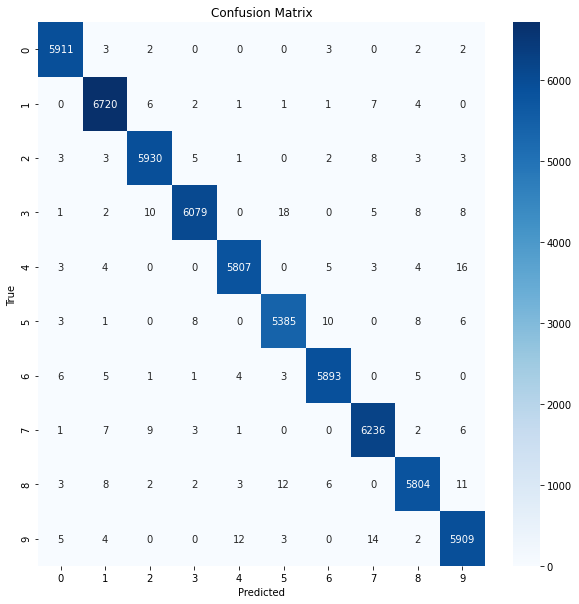

In [18]:
y_train_pred = cross_val_predict(history, train_images, train_Labels, cv=5)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(train_Labels, y_train_pred)
print(cf)
plt.figure(figsize=(10, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(train_Labels, y_train_pred, average='weighted')
recall = recall_score(train_Labels, y_train_pred, average='weighted')
f1 = f1_score(train_Labels, y_train_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Precision: 0.9945683406558868, Recall: 0.9945666666666667, F1 Score: 0.9945662686857413


313/313 [==============================] - 1s 2ms/step
Accuracy: 98.69%
Confusion Matrix:
[[ 975    1    1    1    0    1    1    0    0    0]
 [   0 1130    1    1    0    0    2    1    0    0]
 [   3    4 1015    0    1    0    1    6    2    0]
 [   0    0    2  999    0    4    0    4    1    0]
 [   1    0    0    0  977    0    0    0    0    4]
 [   1    0    0    3    0  885    1    0    2    0]
 [   6    2    1    0    4    1  942    0    2    0]
 [   0    0    5    1    0    0    0 1020    1    1]
 [   9    0    5    3    1    3    1    1  948    3]
 [   1    4    1    1   12    3    0    8    1  978]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.

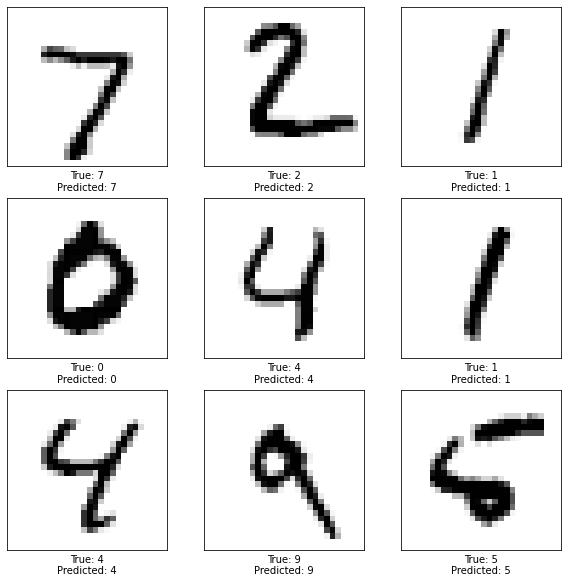

In [10]:
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predicting the labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
# Calculating the accuracy
accuracy = accuracy_score(test_Labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Generating the confusion matrix
conf_matrix = confusion_matrix(test_Labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)
# Generating the classification report
class_report = classification_report(test_Labels, predicted_labels, target_names=class_names)
print('Classification Report:')
print(class_report)
# Visualizing some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'True: {class_names[test_Labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
plt.show()


In [21]:
out = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
num = int(input("Please enter the number of the image you want to test: ")) #taking input from the user


m = -1000
o2 = out[num]
ind = -1

for i in range(len(o2)):
    if o2[i] > m:
        m = o2[i]
        ind = i
print("The predicted class is: ", class_names[ind]) #printing the predicted class
print("The real answer is : ", class_names[test_Labels[num]]) #printing the real answer

The predicted class is:  1
The real answer is :  1
